In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
filename = "countries-coastline-10km.json"
with open(filename) as fp: 
    world_perim = json.load(fp)
world_perim

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-22.94, 16.68],
       [-22.92, 16.86],
       [-22.89, 16.59],
       [-22.94, 16.68]]],
     [[[-24.32, 16.49], [-24.42, 16.65], [-24.01, 16.57], [-24.32, 16.49]]],
     [[[-25.09, 17.2],
       [-24.99, 17.06],
       [-25.3, 16.91],
       [-25.34, 17.09],
       [-25.09, 17.2]]],
     [[[-23.68, 15.31],
       [-23.44, 15.04],
       [-23.48, 14.91],
       [-23.78, 15.06],
       [-23.68, 15.31]]],
     [[[-22.91, 16.15],
       [-22.79, 16.23],
       [-22.67, 16.08],
       [-22.88, 15.97],
       [-22.91, 16.15]]],
     [[[-23.12, 15.14], [-23.23, 15.15], [-23.18, 15.34], [-23.12, 15.14]]],
     [[[-24.39, 14.81],
       [-24.5, 14.92],
       [-24.37, 15.05],
       [-24.28, 14.88],
       [-24.39, 14.81]]]]},
   'properties': {'A3': 'CPV'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-68.31, 12.2],
      [-68.39, 1

In [3]:
def load_USA_geojson(filename):
    query='"properties":{"A3":"USA"}'
    with open(filename) as fp:
        for line in fp:
            if query in line:
                usa_line = line[:-2]
                break
    usa_polygons = json.loads(usa_line)['geometry']
    return usa_polygons

PWS_bounding_box = PWSBB = dict(lonmin=-148.8, 
                                lonmax=-145,
                                latmin=59.65,
                                latmax=61.4)

def keep_polys_touching_PWS(polygons):
    pws_polys = []
    for poly in polygons['coordinates']:
#         the first curve in the polygon is the exterior of the polygon,
#         all wwe care about.
        exterior_curve = poly[0]
        c = pd.DataFrame(exterior_curve, columns=['lon', 'lat'])
        if (np.any(c['lon'] > PWSBB['lonmin']) and 
            np.any(c['lon'] < PWSBB['lonmax']) and
            np.any(c['lat'] > PWSBB['latmin']) and 
            np.any(c['lat'] < PWSBB['latmax'])):
            pws_polys.append([exterior_curve])
    return dict(type='MultiPolygon', coordinates=pws_polys)

def save_multipolygon(mp, name):
    fname = name + ".js"
    with open(fname, 'w') as fp:
        s = "var " + name + " = " + json.dumps(mp)
        fp.write(s)

In [4]:
# def save_ak_coastline_js():
#     usa_polygons = load_USA_geojson("countries-coastline-10m.json")
#     pws_polys = keep_polys_touching_PWS(usa_polygons)
#     save_multipolygon(pws_polys, "pws_coastline_10m")

In [5]:
# save_ak_coastline_js()

In [6]:
fine_pws_polys = keep_polys_touching_PWS(load_USA_geojson("countries-coastline-10m.json"))
print(fine_pws_polys)

{'type': 'MultiPolygon', 'coordinates': [[[[-141.0002, 69.64691], [-141.0006, 69.64662], [-141.00063, 69.53139], [-141.00068, 69.35448], [-141.00072, 69.20648], [-141.00076, 69.06976], [-141.0008, 68.9504], [-141.00083, 68.81145], [-141.00087, 68.63396], [-141.0009, 68.49838], [-141.00094, 68.35173], [-141.00096, 68.21791], [-141.00101, 68.04778], [-141.00104, 67.90425], [-141.00107, 67.73139], [-141.00109, 67.59864], [-141.0011, 67.45337], [-141.00114, 67.30643], [-141.00117, 67.16784], [-141.00121, 67.02893], [-141.00123, 66.88745], [-141.00126, 66.71791], [-141.00127, 66.57886], [-141.0013, 66.43899], [-141.00131, 66.31075], [-141.00132, 66.16596], [-141.00133, 66.00593], [-141.00132, 65.87722], [-141.00133, 65.73461], [-141.00134, 65.58398], [-141.00133, 65.44723], [-141.00132, 65.27084], [-141.00132, 65.11192], [-141.00131, 64.99176], [-141.0013, 64.79954], [-141.00266, 64.7596], [-141.0013, 64.71019], [-141.0013, 64.56134], [-141.00131, 64.4228], [-141.0013, 64.27508], [-141.0013

In [57]:
# for i, poly in enumerate(pws_polys['coordinates']):
#     print("poly number " + str(i) + " has length" + str(len(poly)))
#     for j, curve in enumerate(poly):
#         print("curve number " + str(j) + " has length" + str(len(curve)))

In [7]:
fine_ak_curve = fine_pws_polys['coordinates'][0][0]
lons, lats = zip(*fine_ak_curve)
plt.figure()
plt.plot(lons, lats)

<IPython.core.display.Javascript object>

In [8]:
def inside_mask(pts):
    included = []
    for lon, lat in pts:
        if (lon > PWSBB['lonmin'] and
            lon < PWSBB['lonmax'] and
            lat > PWSBB['latmin'] and 
            lat < PWSBB['latmax']):
            included.append(1)
        else:
            included.append(0)
    return included

In [9]:
fine_inside = inside_mask(fine_ak_curve)
f1, f2 = np.where(np.diff(fine_inside))[0]
f1, f2

(6164, 9544)

In [11]:
coarse_pws_polys = keep_polys_touching_PWS(load_USA_geojson("countries-coastline-10km.json"))

In [12]:
coarse_ak_curve = coarse_pws_polys['coordinates'][0][0]
lons, lats = zip(*coarse_ak_curve)
plt.figure()
plt.plot(lons, lats)

<IPython.core.display.Javascript object>

In [13]:
coarse_inside = inside_mask(coarse_ak_curve)
c1, c2 = np.where(np.diff(coarse_inside))[0]
c1, c2

(134, 179)

In [14]:
combined = coarse_ak_curve[:c1-1] + fine_ak_curve[f1:f2] + coarse_ak_curve[c2+1:]

<IPython.core.display.Javascript object>


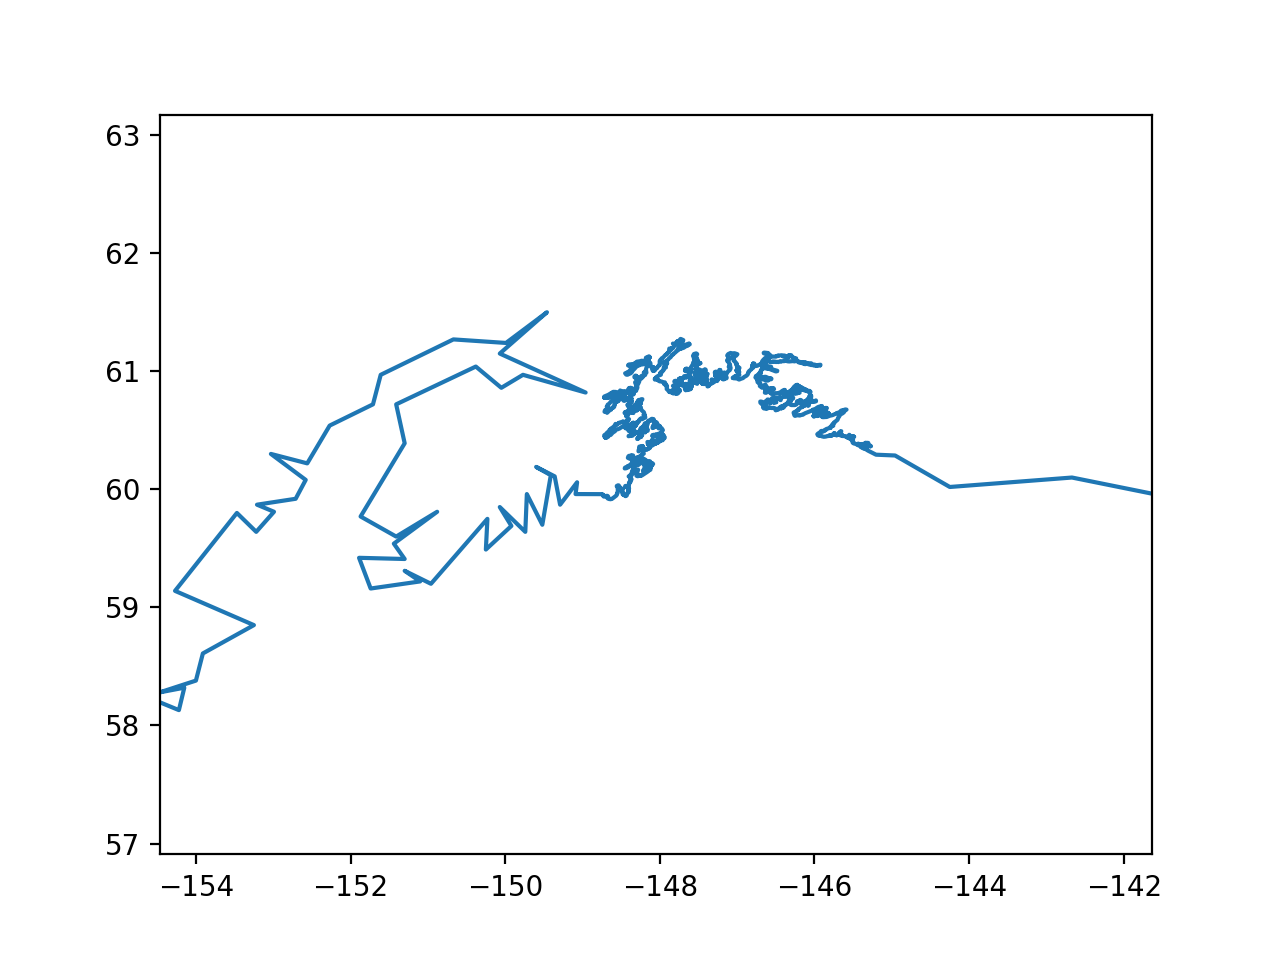

In [15]:
lons, lats = zip(*combined)
plt.figure()
plt.plot(lons, lats)

In [16]:
import copy
mixed_resolution = copy.deepcopy(fine_pws_polys)
mixed_resolution['coordinates'][0][0] = combined
save_multipolygon(mixed_resolution, "pws_coastline_mix")

<IPython.core.display.Javascript object>


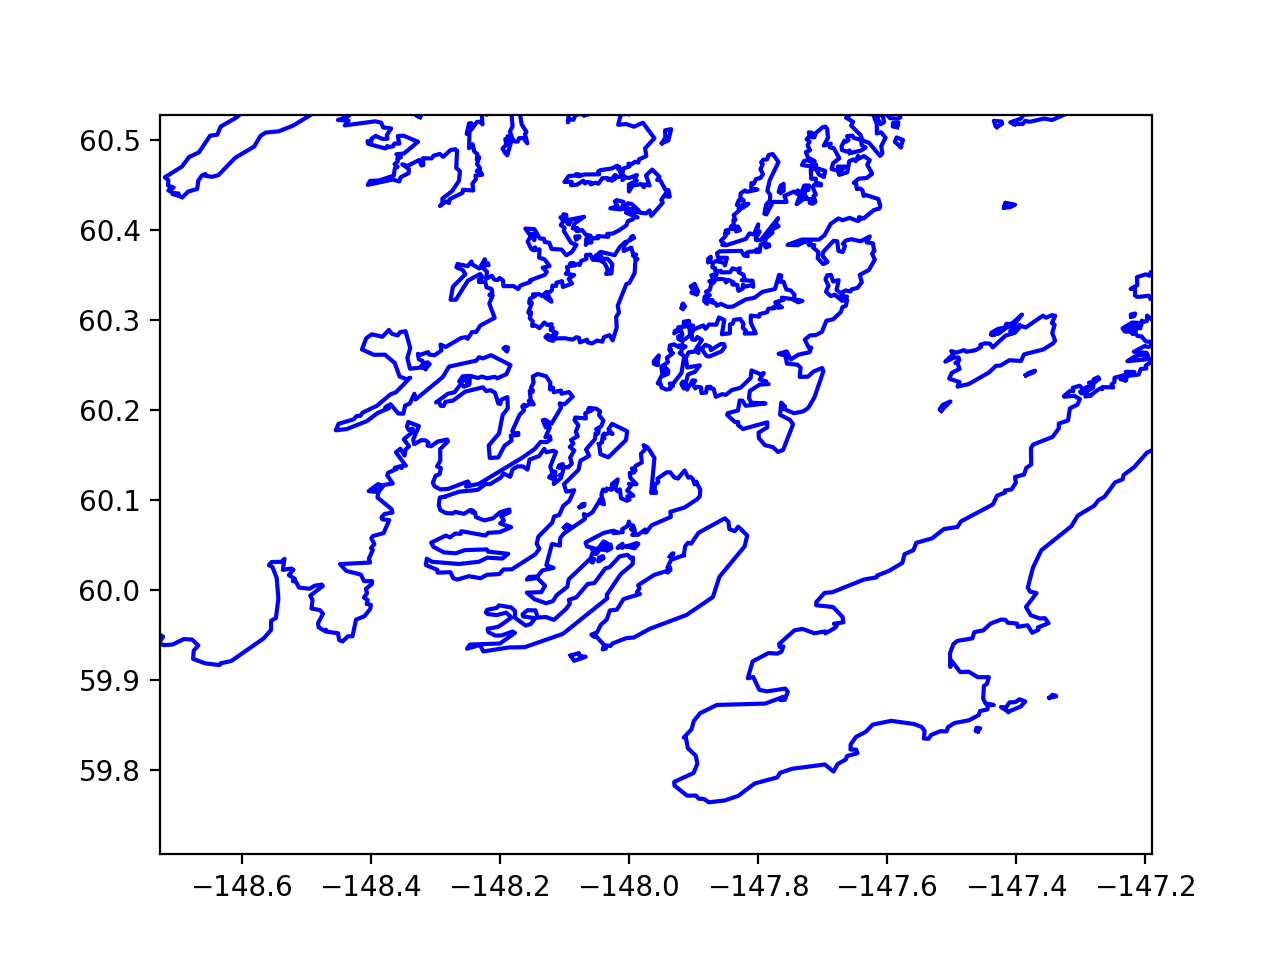

In [21]:
plt.figure()
for poly in mixed_resolution['coordinates']:
    curve = poly[0]
    lons, lats = zip(*curve)
    plt.plot(lons, lats, c='blue')